# 3章 ニューラルネットワーク
## パーセプトロンからニューラルネットワークへ
*ニューラルネットワークは、パーセプトロンができなかったパラメータの重みづけを、自動で行うことが可能になる！*
### ニューラルネットワークの例
* 入力層(0層)、中間層(1層)、出力層(2層)の３つが存在する
* ニューロンの繋がり方はパーセプトロンと大きな変化はなし
* 信号の伝達方法が大きく異なる (以下で詳しく解説)

### パーセプトロンの復習
以下のように、式を書き換える。
* バイアスを入力１、重みbの信号だと解釈する
* 入力信号の総和が関数h(x)によって変換され、出力がyになる

$$ y = h(w_{1}x_{1}+w_{2}x_{2}+b) $$

\begin{eqnarray}
h(x) =\left\{ \begin{array}{ll}
1 & (x > 0  ) \\
0 & (x  \leqq 0  ) \\
\end{array} \right.
\end{eqnarray}

### 活性化関数の登場
* 1.1.2で出てきた入力信号の総和を出力信号に変換する関数のことを活性化関数と呼ぶ
* 重み付き信号とバイアスの総和をaとし、aが関数h()で変換されyが出力されるという流れ
* 活性化によって、出力が得られるという流れが大事 (テキストの図は大事)

$$ a = w_{1}x_{1}+w_{2}x_{2}+b $$

$$ y = h(a) $$

### コラム
多層パーセプトロン・・・・・
> 多層で、シグモイド関数などの滑らかな活性化関数を使用するネットワークを指すのが一般的

## 活性化関数
### ステップ関数
* パーセプトロンの章で出てきた関数のように、ある値を境に値が切り替わる関数のこと
* 階段みたいに、値が突然大きく変わるのが特徴
* パーセプトロンでは、活性化関数にステップ関数を用いている

### ステップ関数の実装

In [1]:
def step_base_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
# Numpyを使う
import  numpy as np

In [5]:
x = np.array([-1.0, 1.0, 2.0])
print(x)

[-1.  1.  2.]


In [8]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [10]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [1]:
# Numpyによる書き換え
import matplotlib.pylab as plt

def step_func(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_func(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y axis range
plt.show()

NameError: name 'np' is not defined

### シグモイド関数
* ニューラルネットワークではよく用いられる活性化関数

式は以下に示す。

$ h(x) = \frac { 1 }{ 1 + exp(-x) }$

### シグモイド関数の実装

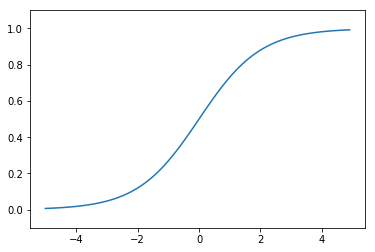

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp( -x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### ステップ関数とシグモイド関数の比較
* シグモイドはなめらか、連続的
* シグモイドは、0,1以外に、0.78...などの実数も取りうる
* マクロな視点で見ると、入力がとても小さい時は共に出力は０になり、入力がとても大きい時は共に出力は１になる
* 非線形関数である (**ニューラルネットワークではマスト**)

### 非線形関数
* **ニューラルネットワークではマストである**
* 線形関数はどんなに層を深くしても、隠れ層のない表現ができるため

**etc): 重要**   
$h(x)= cx$とすると、$y(x) = h(h(h(x))) = c^3x$  
つまり、$a=c^3$ と見ることで $y(x) = ax$の形に帰着できてしまう

### ReLU関数
* 最近、シグモイドの代わりとしてよく使われる

式は以下に示す。

\begin{eqnarray}
h(x) =\left\{ \begin{array}{ll}
x & (x > 0  ) \\
0 & (x  \leqq 0  ) \\
\end{array} \right.
\end{eqnarray}

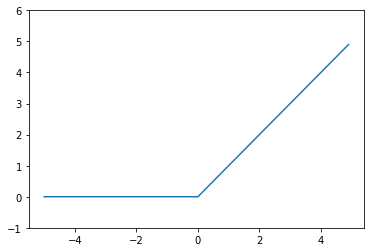

In [17]:
# 実装
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6)
plt.show()

## 多次元配列の計算
### 多次元配列


In [19]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [20]:
np.ndim(A)

1

In [21]:
A.shape

(4,)

In [22]:
A.shape[0]

4

In [23]:
B = np.array([[1,2], [3, 4], [5 ,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [25]:
np.ndim(B)

2

In [26]:
B.shape

(3, 2)

### 行列の積

In [28]:
A = np.array([[1,2], [3,4]])
A.shape

(2, 2)

In [29]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [30]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [32]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [33]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

**行列の掛け算 (A×B) は、Aの列数とBの行数を同じにする必要がある**  
A: 2×3, B: 3×2だと、Aの３とBの３が一致

In [34]:
C = np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [35]:
A.shape

(2, 3)

In [36]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [37]:
# 逆にするといけるはず
np.dot(C,A)

array([[ 9, 12, 15],
       [19, 26, 33]])

### ニューラルネットワークと行列の積
活性化関数とバイアスは無視して、ニューラルネットワークを簡単に実装してみる  
ニューラルネットワークの各層の計算は、行列の積でまとめて行えるのがポイント

In [38]:
X = np.array([1, 2]) # 入力
X.shape

(2,)

In [42]:
W = np.array([[1,3,5],[2,4,6]]) # 重み
print(W)

[[1 3 5]
 [2 4 6]]


In [43]:
W.shape

(2, 3)

In [44]:
Y = np.dot(X, W) # 出力
print(Y)

[ 5 11 17]


## 3層ニューラルネットワークの実装
### 記号の確認
$$ w_{12}^{(1)} $$   
(1): 第１層の重み  
12: 前層の２番目のニューロンから次層の１番目のニューロンへの重み

### 各層に置ける信号伝達の実装 
以下のニューラルネットワークの計算を行列で表す。   
$x_1$, $x_2$, $1$ → $a_1^{(1)}$,  $a_2^{(1)}$,  $a_3^{(1)}$  

まず、$a_1$について、以下の式で表せる。  
$a_1^{(1)} = w_{11}^{(1)} x_1 +  w_{12}^{(1)} x_2 + b_1^{(1)} $  

以上より、行列の積を用いると重み付き和は、次の式でまとめられる。
$ A^{(1)} = XW^{(1)} + B^{(1)}$  

この時、それぞれ以下の通りである。  
$A^{(1)} = \begin{pmatrix}
a_1^{(1)} & a_2^{(1)} & a_3^{(1)} \\
\end{pmatrix},   
X = \begin{pmatrix}
x_1 & x_2\\
\end{pmatrix},   
B^{(1)} = \begin{pmatrix}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \\
\end{pmatrix}$  
$W^{(1)} = \begin{pmatrix}
 w_{11}^{(1)} &  w_{21}^{(1)} &  w_{31}^{(1)} \\
 w_{12}^{(1)} &  w_{22}^{(1)} &  w_{32}^{(1)} \\
\end{pmatrix}
$

In [48]:
# 試してみる
# 0層(2つのニューロン)から1層(３つのニューロン)
X = np.array([1.0, 0.5]) # 入力(x1,x2)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #重み [ x1の重み, x2の重み]
B1 = np.array([0.1, 0.2, 0.3])　# バイアス
A1 = np.dot(X, W1) + B1
print(A1)

[ 0.3  0.7  1.1]


In [49]:
# 次に活性化関数を通す
Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [51]:
# 1層から2層(２つのニューロン)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2
print(A2)

[ 0.51615984  1.21402696]


In [52]:
Z2 = sigmoid(A2)
print(Z2)

[ 0.62624937  0.7710107 ]


In [53]:
# 2層から出力層へ

# 出力層の活性化関数を恒等関数と呼ぶ 
# 他の層の活性化関数とは別に扱う
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[ 0.31682708  0.69627909]


### 実装のまとめ

In [55]:
# 変数をまとめて返す関数
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([[0.1, 0.2]])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# 実際の処理
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [56]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[[ 0.31682708  0.69627909]]


## 出力層の設定
### コラム
機械学習の問題は、以下の２つに大きく分類できる
* 分類問題・・・その人が男or女かを分類する感じ
* 回帰問題・・・人の画像から、その人の体重を予測する感じ(入力データから数値の予測を行う問題)

### 恒等関数とソフトマックス関数
* 恒等関数・・・入力をそのまま返す 
* ソフトマックス関数・・・  

以下の式で算出 (**全ての入力信号の影響を受ける**)  
フィッティングのためにある  

$\displaystyle y_k = \frac { exp(a_k) }{\sum_{i=1}^{n} exp(a_i)}$  

**差を増幅させる方向に向ける**


In [58]:
# 実装
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a


print(exp_a)
print(sum_exp_a)
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [63]:
# 関数化
def base_softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### ソフトマックス関数の実装上の注意
・・・・現状のままだとオーバーフローが起こる。指数関数の100乗などはとてつもなく大きい  

以下のように式変形してオーバーフロー対策を行う  
$\displaystyle y_k = \frac { exp(a_k) }{\sum_{i=1}^{n} exp(a_i)}
                            = \frac { C exp(a_k) }{C \sum_{i=1}^{n} exp(a_i)}
                             = \frac { exp(a_k + \log C ) }{\sum_{i=1}^{n} exp(a_i + \log C)}
                              = \frac { exp(a_k + C' ) }{\sum_{i=1}^{n} exp(a_i + C')}$  
                              
                              
以上の式よりわかることは、  
**ソフトマックスの指数関数の計算を行う際には、何らかの定数を足し算(引き算)しても結果は変わらないということ！！**

In [148]:
# 実際の例
a  = np.array([1010, 1000, 990])
base_softmax(a) # オーバーフロー

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([ nan,  nan,  nan])

In [65]:
c = np.max(a) # 1010
d = a - c
base_softmax(d)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [66]:
e = np.min(a) # 990
f = a - e 
base_softmax(f)

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [135]:
#以上を踏まえた実装
def softmax(x):
    c = np.max(x)
    exp_a = np.exp(x - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### ソフトマックス関数の特徴
* 出力が0~1.0の間の実数になる
* 各出力の総和が１になる => 確率として解釈できる！
* ソフトマックス関数の前後で、値の大小関係は変わらない => 省略されることが多い

**まとめ**  
得られた入力を、確率に置き換える関数。  
分類する時は数の大小関係さえわかればいいので、省略されることがある(指数関数の処理が重いため)

### コラム
機械学習の問題を解く手順は、「学習」「推論」の２つのフェーズがある。
* 学習・・・モデルの学習。訓練データで、重みのパラメータの決定を行う
* 推論・・・得られたモデルで未知データの分類

### 出力層のニューロンの数
* 解くべき問題に応じて変化
* クラス分類の場合は、分類したいクラスの数に設定する


## 手書き数字認識
学習が終了したとして推論を行ってみる

### MINISTデータセット
実験用の手書き数字の画像セット  
以下、データセットの読み込みを行う

In [2]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
      load_mnist(flatten=True, normalize=False)
    
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


**引数の説明**
* normalize・・・入力画像を0~1.0の値に正規化するかどうかの設定。Falseだとピクセル画像のまま読み込み
* flatten・・・１次元配列に出力するかどうか
* one_hot_label・・・ラベルを単純に配列に格納するのか、それとも０、１で表現するのか

In [97]:
# 実際のデータの確認
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
#     pil_img.show()
    plt.imshow(img)
    plt.show()

In [78]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [79]:
print(img.shape) # flatten=Trueの影響

(784,)


In [80]:
img = img.reshape(28,28) # 画像サイズの変形
print(img.shape)

(28, 28)


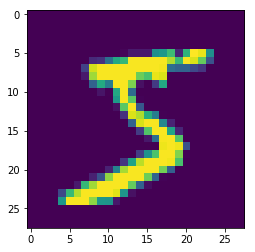

In [98]:
img_show(img)  

### ニューラルネットワークの推論処理
**条件**
* 入力層・・・784個 (28×28px)
* 出力層・・・10個 (0~9の数字判定)
* 隠れ層・・・１つ目：50個、２つ目: 100個 (これらは任意)

In [150]:
# 実装
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
          load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test
    
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network
        
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # なくてもAccuracyは変化しない
    
    return y

In [151]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    
    y = predict(network, x[i])
    p = np.argmax(y) # 最も確率要素の高いインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1

print("Accurancy:" + str(float(accuracy_cnt) / len(x)))

Accurancy:0.9352


**ワード**
* 正規化・・・データを決まった範囲に変換
* 前処理・・・入力データに対して、何らかの決まった変換を行うこと

前処理は、一般的にはデータ全体の平均や標準偏差などを利用してデータ広がりを抑えることが多い

### バッチ処理


In [108]:
# 先ほどの処理を追っていく
x, t = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [109]:
x.shape

(10000, 784)

In [110]:
x[0].shape

(784,)

In [111]:
W1.shape

(784, 50)

In [112]:
W2.shape

(50, 100)

In [113]:
W3.shape

(100, 10)

In [147]:
# バッチ処理の実装
x, t = get_data()
network = init_network()

batch_size = 100 # バッチ数

accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy" + str(float(accuracy_cnt) / len(x)))

Accuracy0.9352


In [125]:
# argmax の使い方
x = np.array([[0.1, 0.8,0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [128]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y==t)

[ True  True False  True]


In [129]:
np.sum(y==t)

3

# まとめ

* ニューラルネットワークでは、活性化関数としてシグモイド関数や ReLU 関数のような滑らかに変化する関数を利用する
* Numpyすごい！入力データをまとめて処理させて、高速化を実現できる
